In [2]:
# Libraries for data preprocessing and visualization

import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot  as plt
import matplotlib as mp
import numpy as np
import math

# Libraries for creating models and data scaling

from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM, Input, Bidirectional
from keras.models import Sequential

from xgboost import XGBRegressor

from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


# Step-1: Import Libraries:

We have imported Numpy, Pandas, Seaborn, Matplot, libraries for evaluating the dataset.  

Numpy is an open-source module that provides fast mathematical computation on arrays and 
matrices. We know that Arrays are an integral part of the Machine Learning Ecosystem.  

Pandas will be useful for performing operations on the data frame.  

Seaborn and Matplot lib are visualization tools that help us to visualize data in a 
better way.  

We have imported the required DL model(Sequential) and NN layers(Dense, Activation, 
Dropout, Bidirectional) and RNN Layer(LSTM) for model creation as well as scaling the data and error evaluation of the model. 

We have also imported Xgboost regreesor model and Elastic Net linear regression model.

The MinMaxScaler is used to scale the rainfall data into the range 0 to 1.  
The data is trained after it is split into train set and test set.  

In [3]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/'
    'devashishpan/major_project/master/Datasets/'
    'rainfall%20in%20india%201901-2017.csv'
)

## About the Dataset :-

- The dataset used in this system contains the rainfall of several regions in and across the country. It contains rainfall from 1901 – 2017 for the same. 

- There are in total 4188 rows present in the dataset. 

- Data has 36 sub divisions and 19 attributes (individual months, annual, combinations of 2-4 consecutive months).

- The dataset is been collected from https://data.gov.in/resource/sub-divisional-monthly-rainfall-1901-2017.

- All the attributes has the sum of amount of rainfall in mm.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

In [5]:
data.head(7)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,Andaman & Nicobar Islands,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,Andaman & Nicobar Islands,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9


In [6]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

In [7]:
data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
JAN,4184.0,18.938337,33.793128,0.0,0.600,5.95,22.000,583.7
FEB,4185.0,21.599427,35.731734,0.0,0.500,6.50,26.600,403.5
MAR,4182.0,27.412912,46.927963,0.0,1.000,7.90,31.375,605.6
APR,4184.0,43.071845,68.150985,0.0,3.000,15.45,49.650,595.1
MAY,4185.0,85.660860,122.695137,0.0,8.600,36.90,97.800,1168.6
JUN,4183.0,230.117475,234.292087,0.4,70.800,138.80,305.000,1609.9
JUL,4181.0,347.020043,268.850702,0.0,175.600,285.00,418.500,2362.8
AUG,4184.0,289.742185,188.426071,0.0,155.850,258.50,377.625,1664.6
SEP,4182.0,197.316332,135.547646,0.1,100.400,173.70,266.125,1222.0
OCT,4181.0,95.324707,99.194851,0.0,14.600,65.20,148.300,948.3


# Step-2: Visualization of Data and Observing it to Learn form it.

We need to understand our data. Data visualization is a powerful technique that helps us to know about the trends, patterns that our data follows. There are different techniques to visualize data, one such method is a correlation. Correlation tells us how one or more are related. If two variables are correlated, then we can tell that both are strongly dependent on each other. The variables that are strongly correlated to the target variable, are said to have more influence on the target variable.  

Correlation also helps us to remove certain values, as this is one of the feature extraction techniques. If two independent variables are strongly correlated with each other, we can remove any one of the variables. This may not cause any disruption to the dataset.  

Correlation can also be visualized using Heatmap. Heatmap is one of the visualizing graphs like Histograms, Boxplots that help us to know our data easily. As human minds are so complex to understand data from numbers, they can easily understand using pictures.  

A histogram is used to summarize discrete or continuous data. In other words, it provides a visual interpretation. of numerical data by showing the number of data points that fall within a specified range of values.

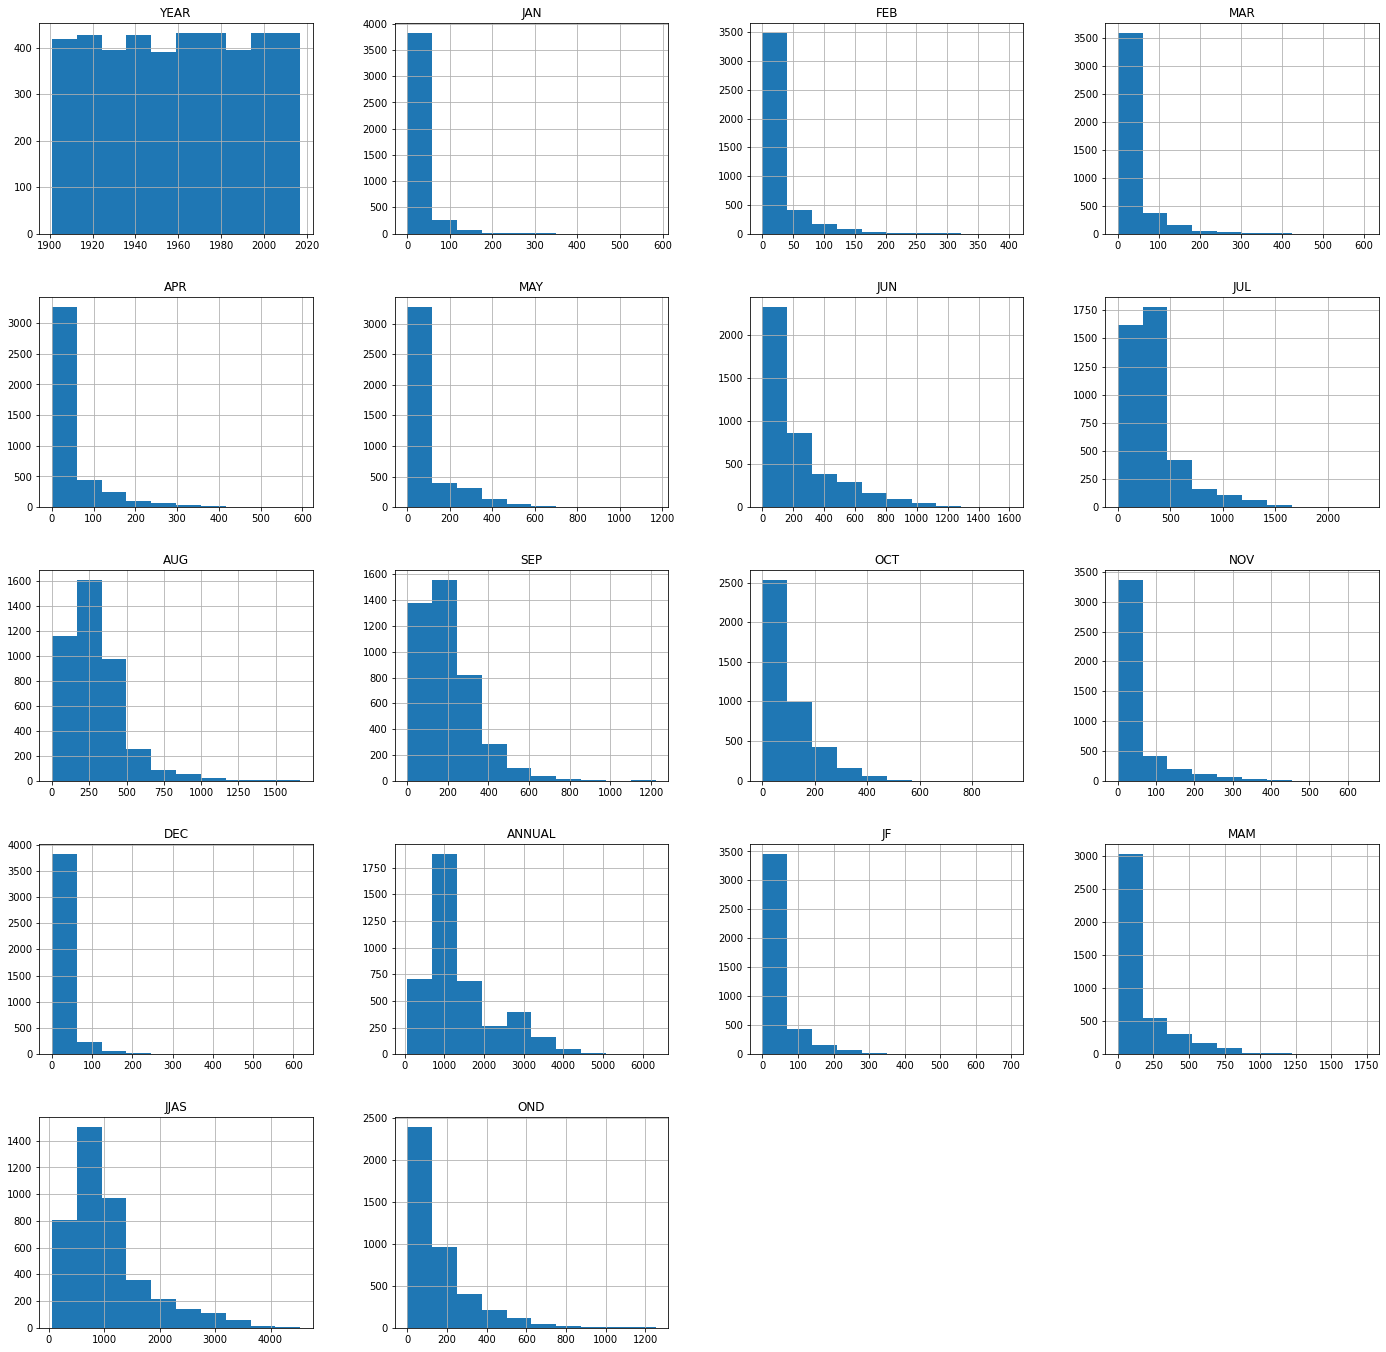

In [8]:
data.hist(figsize=(24,24));

## Observations :-
- Above histograms show the distribution of rainfall over months.
- Observed increase in amount of rainfall over months July, August, September.

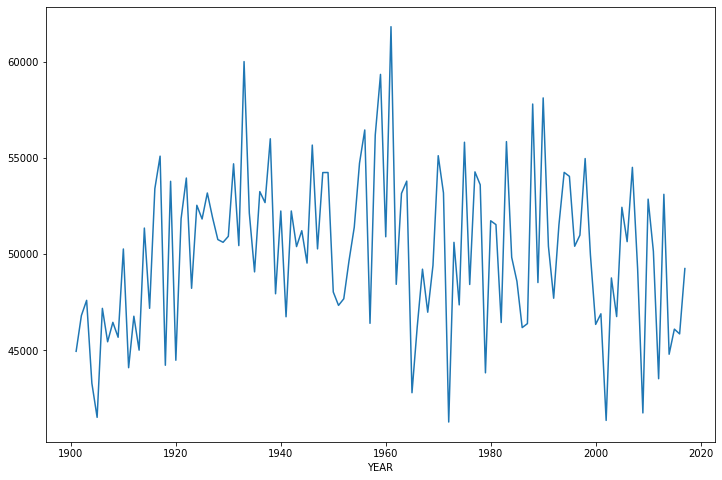

In [9]:
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));

SUBDIVISION	SUBDIVISION	SUBDIVISION	## Observations :-
- Shows distribution of rainfall over years.
- Observed high amount of rainfall in 1950s.
- Before the 1950s there is an increaing trend while after 1960s there is a decreasing trend.


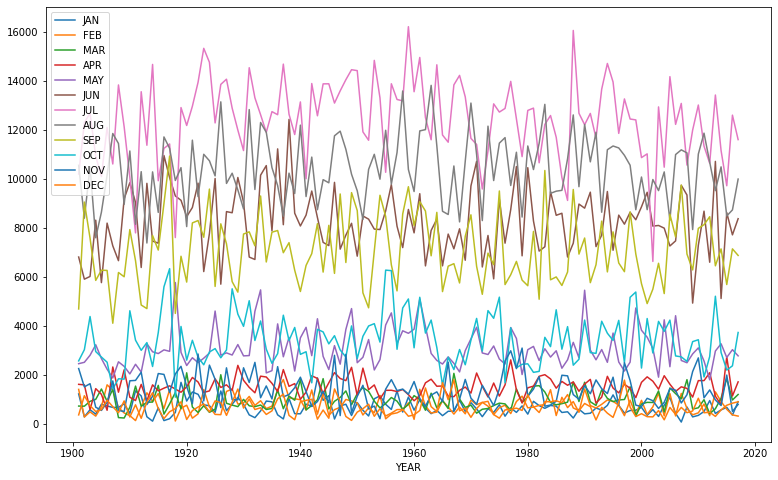

In [10]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));

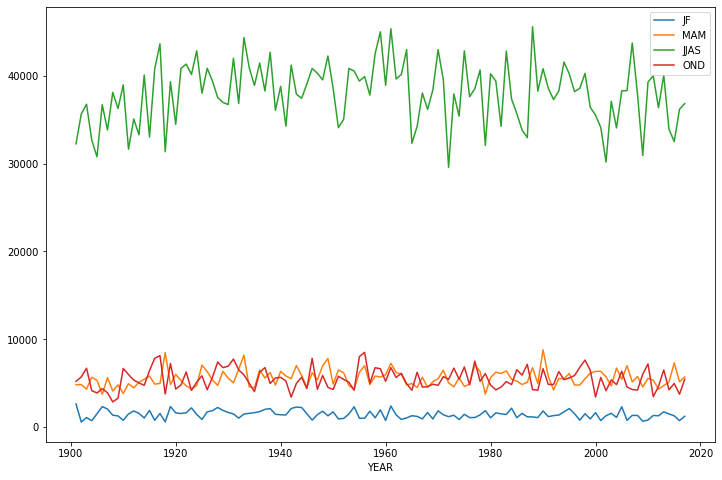

In [11]:
data[['YEAR','JF', 'MAM','JJAS', 'OND']].groupby("YEAR").sum().plot(figsize=(12,8));

## Observations :- 
- The above two graphs show the distribution of rainfall over months.
- The graphs clearly shows that amount of rainfall in high in the months june, july, aug, sep which is monsoon season in India.

In [12]:
print("Number of Sub-Divisions :- ",len(data.SUBDIVISION.unique()),"\n")
for i,sd in enumerate(data.SUBDIVISION.unique()):
    print(f"{i+1}. {sd}")

Number of Sub-Divisions :-  36 

1. Andaman & Nicobar Islands
2. Arunachal Pradesh
3. Assam & Meghalaya
4. Naga Mani Mizo Tripura
5. Sub Himalayan West Bengal & Sikkim
6. Gangetic West Bengal
7. Orissa
8. Jharkhand
9. Bihar
10. East Uttar Pradesh
11. West Uttar Pradesh
12. Uttarakhand
13. Haryana Delhi & Chandigarh
14. Punjab
15. Himachal Pradesh
16. Jammu & Kashmir
17. West Rajasthan
18. East Rajasthan
19. West Madhya Pradesh
20. East Madhya Pradesh
21. Gujarat Region
22. Saurashtra & Kutch
23. Konkan & Goa
24. Madhya Maharashtra
25. Matathwada
26. Vidarbha
27. Chhattisgarh
28. Coastal Andhra Pradesh
29. Telangana
30. Rayalseema
31. Tamil Nadu
32. Coastal Karnataka
33. North Interior Karnataka
34. South Interior Karnataka
35. Kerala
36. Lakshadweep


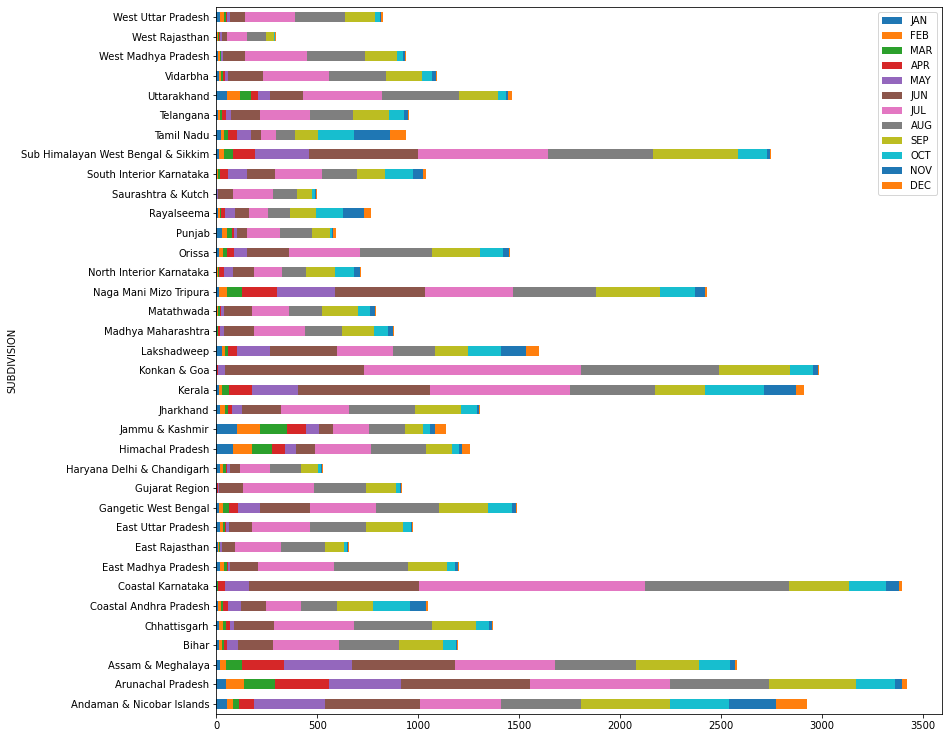

In [13]:
data[['SUBDIVISION', 'JAN', 'FEB',
      'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC'
     ]].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,13));

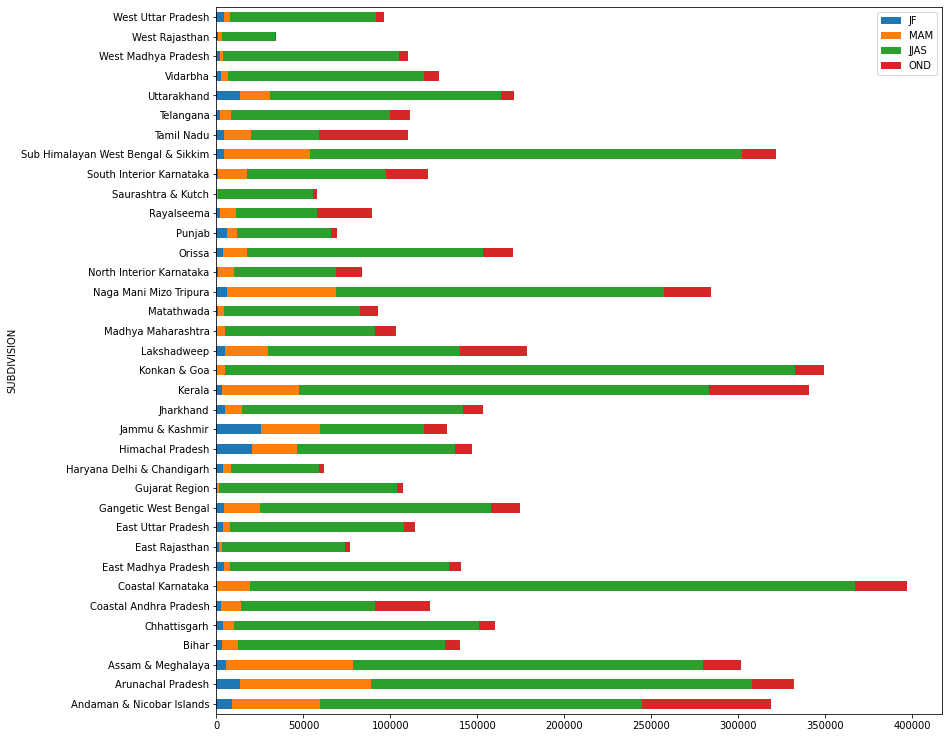

In [14]:
data[['SUBDIVISION', 'JF', 'MAM',
       'JJAS', 'OND'
     ]].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(13,13));

## Observations :-

- Above two graphs shows that the amount of rainfall is reasonably good in the months of march, april, may in eastern India.
- Jammu & Kashmir, Himachal Pradesh and Uttarakhand receives some rainfall in January and February.
- The southern part of west and east cost along with the island groups like Andaman & Nicobar Islands and Lakshdeep receive healthy amount of rain in winter.
- Rajasthan receives the Least amount of rain while Coastal Karnataka receives the most amount of rain, in both cases monsoon showers create almost 90% of the precipitaion.

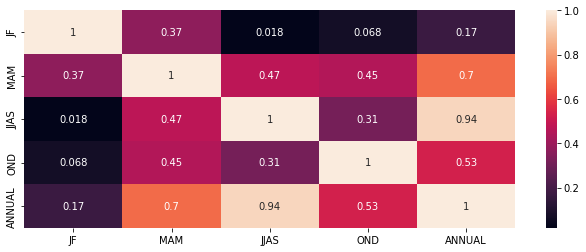

In [15]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['JF', 'MAM','JJAS', 'OND','ANNUAL']].corr(),annot=True)
plt.show()

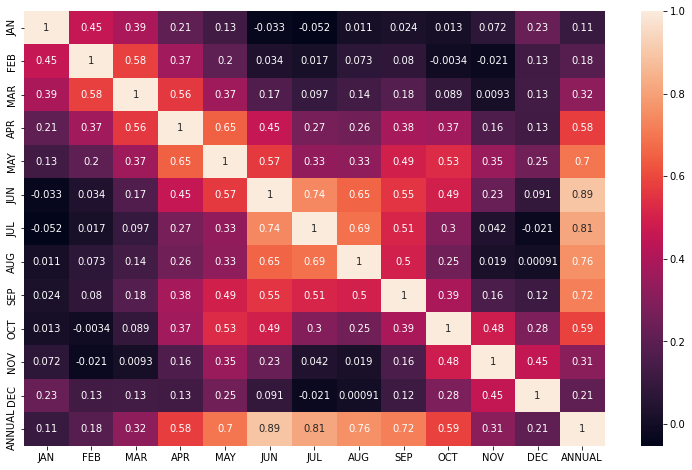

In [16]:
plt.figure(figsize=(13,8))
sns.heatmap(data[[
    'JAN','FEB',
    'MAR','APR','MAY',
    'JUN','JUL','AUG','SEP',
    'OCT','NOV','DEC','ANNUAL'
]].corr(),annot=True)
plt.show()

## Observations :- 
- Heat Map shows the co-relation(dependency) betwenn the amounts of rainfall over months.
- From above it is clear that if amount of rainfall is high in the months of july, august, september then the amount of rainfall will be high annually.
- It is also observed that if amount of rainfall in good in the months of october, november, december then the rainfall is going to be good in the overall year.

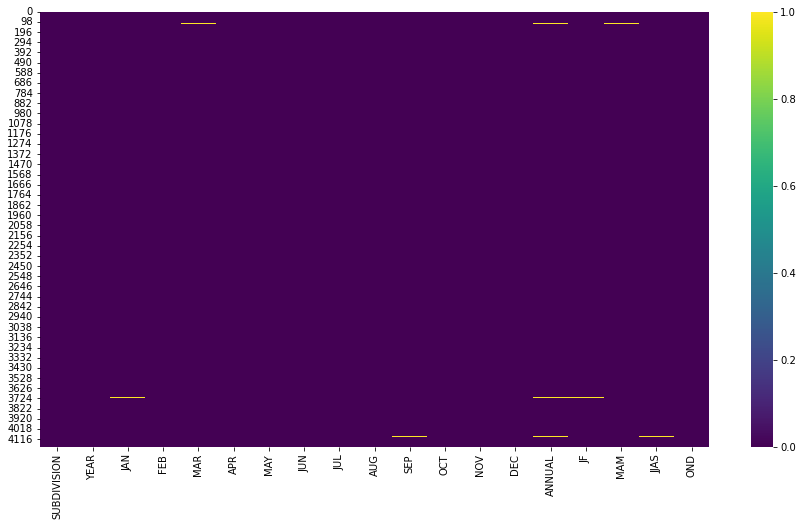

In [17]:
# checking the data for Null values using a heatmap 
plt.figure(figsize=(15,8))
sns.heatmap(data.isna(), cmap = 'viridis');

# Observation:- 
- From the above Heatmap, we can deduce that there are some rows where there is presence of null or Nan values.



# Step-3: Prepare Dataset

For Prediction model preparation, we are considering only one sub-division, here Jharkhand.

We prepare the dataset by melting the columns containg the avg. momthly rainfall into rows
and the rearrange the values in proper order and then we substitute the months names with 
coressponding number.  

Then again sort the data so that it remains in a Time series of monthly avg. rainfall From Jan 1901 - Dec 2017.


In [18]:
# grouping the data using the above sub-division 
# and selecting only monthly average rainfall
groups = data.groupby('SUBDIVISION')[['YEAR',
                                      'JAN','FEB','MAR',
                                      'APR','MAY','JUN',
                                      'JUL','AUG','SEP',
                                      'OCT','NOV','DEC'
                                     ]]

# Selecting only a single sub-division data.
datajh=groups.get_group(('Jharkhand'))

In [19]:
# using describe to get count, mean, standard deviation, min and max data
datajh[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
JAN,117.0,17.471795,20.351628,0.0,2.5,9.5,24.7,102.9
FEB,117.0,23.838462,25.697903,0.1,7.6,16.1,32.8,128.5
MAR,117.0,18.296581,19.738034,0.0,3.6,11.1,26.6,95.0
APR,117.0,19.096581,16.145139,0.1,7.7,15.6,26.3,95.6
MAY,117.0,48.591453,28.502564,3.2,27.2,42.4,66.4,150.1
JUN,117.0,193.304274,86.938652,41.5,125.5,182.4,255.5,479.6
JUL,117.0,337.994017,89.975472,149.7,276.6,334.9,389.6,660.2
AUG,117.0,325.443590,75.099282,152.8,265.5,331.7,378.2,552.5
SEP,117.0,227.136752,73.270177,85.1,173.8,217.6,274.6,395.9
OCT,117.0,79.921368,64.898830,1.6,35.3,55.9,111.3,281.1


In [20]:
# Melting all columns, according to Year column into rows.
datajh=datajh.melt(['YEAR']).reset_index()
datajh

,index,YEAR,variable,value
0,0,1901,JAN,92.7
1,1,1902,JAN,4.2
2,2,1903,JAN,25.1
3,3,1904,JAN,2.5
4,4,1905,JAN,38.4
...,...,...,...,...
1399,1399,2013,DEC,0.0
1400,1400,2014,DEC,1.2
1401,1401,2015,DEC,2.7
1402,1402,2016,DEC,0.0


In [21]:
# We sort the data by Year and index.
df= datajh[['index','YEAR','variable','value']].sort_values(by=['YEAR','index'])
df

,index,YEAR,variable,value
0,0,1901,JAN,92.7
117,117,1901,FEB,66.6
234,234,1901,MAR,11.1
351,351,1901,APR,18.4
468,468,1901,MAY,33.5
...,...,...,...,...
935,935,2017,AUG,246.0
1052,1052,2017,SEP,134.0
1169,1169,2017,OCT,103.4
1286,1286,2017,NOV,2.3


In [22]:
# we rename the columns 
df.columns=['INDEX','YEAR','Month','avg_rainfall']
df

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,92.7
117,117,1901,FEB,66.6
234,234,1901,MAR,11.1
351,351,1901,APR,18.4
468,468,1901,MAY,33.5
...,...,...,...,...
935,935,2017,AUG,246.0
1052,1052,2017,SEP,134.0
1169,1169,2017,OCT,103.4
1286,1286,2017,NOV,2.3


In [23]:
# we are then substituting the months with coresponding number.
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,92.7
117,117,1901,2,66.6
234,234,1901,3,11.1
351,351,1901,4,18.4
468,468,1901,5,33.5
...,...,...,...,...
935,935,2017,8,246.0
1052,1052,2017,9,134.0
1169,1169,2017,10,103.4
1286,1286,2017,11,2.3


In [24]:
# We select only the avg_rainfall column
cols=[]
dataset=df[['avg_rainfall']]
dataset

,avg_rainfall
0,92.7
117,66.6
234,11.1
351,18.4
468,33.5
...,...
935,246.0
1052,134.0
1169,103.4
1286,2.3


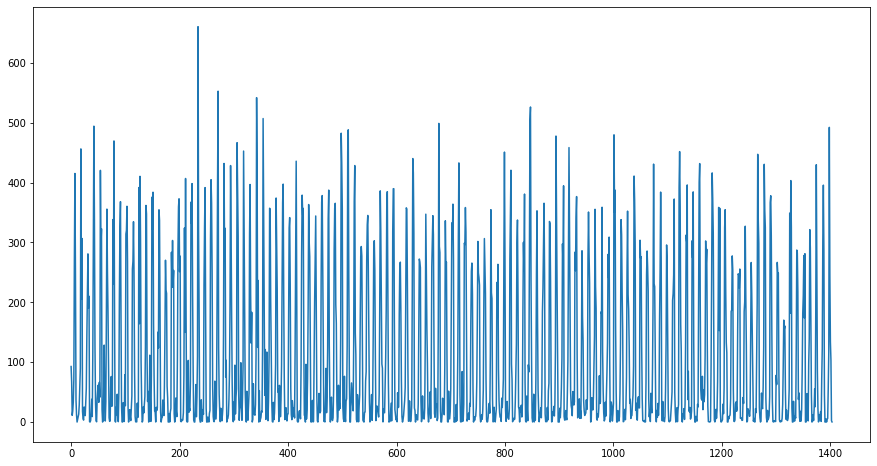

In [25]:
# We then Display the Data in a plot
plt.figure(figsize=(15,8))
plt.plot(dataset.values)
plt.show()


# Step-4: Data Preprocessing  

Data Preprocessing is the most vital step while preparing our dataset for model training.Data is often inconsistent, incomplete, and consists of noise or unwanted data. So, preprocessing is required. It involves certain steps like handling missing values, handling outliers, encoding techniques, scaling.

Removing null values is most important because the presence of null values will disturb the  distribution of data, and may lead to false predictions. There is very less percent of null  values in the dataset.

Missing values:  
Imputation is used for replacing missing values. There are few kinds of imputation techniques  like Mean imputation, Median imputation, Mode Imputation, Random Sampling imputation, etc. Based on the type of data we have, we can use the required imputation. We have used median  imputation to handle missing values.

Handling Outliers:  
Outliers are nothing but an extreme value that deviates from the other observations in the dataset. These outliers are either removed or replaced with their nearest boundary value, either upper boundary or lower boundary value.

Scaling: 
It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. Here, we are performing a min-max scaling.


In [26]:
# As we have seen in the Heatmap tha there are some missing values in the dataset, so we will fill them with Mean
# rainfall value of each Sub-division respectivly.
data_raw = dataset.values.astype("float32")
m = dataset.mean()
for i in range(len(data_raw)):
    if(np.isnan(data_raw[i])):
        data_raw[i] = m
data_raw

array([[ 92.7],
       [ 66.6],
       [ 11.1],
       ...,
       [103.4],
       [  2.3],
       [  0.2]], dtype=float32)

## Min-max scale
Also known as min-max scaling or min-max normalization, rescaling is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.  

In [27]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_scaled = scaler.fit_transform(data_raw)
data_scaled

array([[0.14041199],
       [0.10087851],
       [0.01681309],
       ...,
       [0.1566192 ],
       [0.00348379],
       [0.00030294]], dtype=float32)

# Step-5: Splitting the Dataset

Dividing the dataset into two sets should be done precisely. The dataset can be divided into the ratio of 80% train set, 20% test set or 70% train set, 30% test set, or any other way. The division of the dataset also affects the accuracy of the training model. A slicing operation can be performed to separate the dataset.

We’ve take care while splitting the dataset, assure that the test set must hold an equivalent features as the train set and also the datasets must be statistically meaningful.

We have divided the dataset into :- 
- 80% training dataset
- 20% testing dataset

For prediction we have formatted data in the way, given the rainfall in the last one month we try to predict the rainfall in the next consecutive month. This is called one-step forecasting.
Predicting one time steps into the future is called one-step time series forecasting. 

In [28]:
TRAIN_SIZE = 0.80

train_size = int(len(data_scaled) * TRAIN_SIZE)
test_size = len(data_scaled) - train_size
train_dl, test_dl = data_scaled[0:train_size, :], data_scaled[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train_dl), len(test_dl))))

Number of entries (training set, test set): (1123, 281)


In [29]:
train_size = int(len(data_raw) * TRAIN_SIZE)
test_size = len(data_raw) - train_size
train, test = data_raw[0:train_size, :], data_raw[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1123, 281)


In [30]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [31]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
train_X_, train_Y_ = create_dataset(train_dl, window_size)
test_X_, test_Y_ = create_dataset(test_dl, window_size)
print("Original training data shape for DL:")
print(train_X_.shape)

# Reshape the input data into appropriate form for Keras.
train_X_dl = np.reshape(train_X_, (train_X_.shape[0], 1, train_X_.shape[1]))
test_X_dl = np.reshape(test_X_, (test_X_.shape[0], 1, test_X_.shape[1]))
print("New training data shape:")
print(train_X_dl.shape)

Original training data shape for DL:
(1121, 1)
New training data shape:
(1121, 1, 1)


In [32]:
train_X_dl

array([[[0.14041199]],

       [[0.10087851]],

       [[0.01681309]],

       ...,

       [[0.00090882]],

       [[0.03029385]],

       [[0.04422902]]], dtype=float32)

In [35]:
train_Y_

array([0.10087851, 0.01681309, 0.02787034, ..., 0.03029385, 0.04422902,
       0.5926991 ], dtype=float32)

# Step-6: Model Training

For Training the model we are creating an ANN (Artificial Neural Network), with 1 LSTM layer with 4 Dense Layers with alternative Dropout layers in between.

The accuracy is then Measured in RMSE(Root Mean Squared Error).

After that the predicted values for training as well as testing dataset are plotted in a line plot for visual comparision.

In [37]:
def fit_model_lstm_stacked(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(Input(shape = (1, window_size)))
    
    model.add(
        LSTM(
        200,
        activation = 'tanh',
        recurrent_activation = 'hard_sigmoid',
        return_sequences=True,
        )
    )
    
    model.add(Dropout(0.2))
    
    model.add(
        LSTM(
        200,
        activation = 'tanh',
        recurrent_activation = 'hard_sigmoid',
        )
    )
    
    model.add(Dropout(0.4))
    
    model.add(Dense(50,activation = 'tanh',))
    
    model.add(Dropout(0.4))
    
    model.add(Dense(40,activation = 'tanh',))
    
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation = 'linear'))
    
    model.compile(
        loss = "mean_squared_error", 
        optimizer = "adam",
        metrics=['accuracy'],
    )
    model.fit(train_X, 
              train_Y, 
              epochs = 10, 
              batch_size = 64,
              )
    
    return(model)

In [38]:
def fit_model_lstm_bidirectional(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(Input(shape = (1, window_size)))
    
    model.add(Bidirectional(
        LSTM(
        200,
        activation = 'tanh',
        recurrent_activation = 'hard_sigmoid',
        return_sequences=True,
        )
    ))
    
    model.add(Dropout(0.2))
    
    model.add(Bidirectional(
        LSTM(
        200,
        activation = 'tanh',
        recurrent_activation = 'hard_sigmoid',
        )
    ))
    
    model.add(Dropout(0.4))
    
    model.add(Dense(50,activation = 'tanh',))
    
    model.add(Dropout(0.4))
    
    model.add(Dense(40,activation = 'tanh',))
    
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation = 'linear'))
    
    model.compile(
        loss = "mean_squared_error", 
        optimizer = "adam",
        metrics=['accuracy'],
    )
    model.fit(train_X, 
              train_Y, 
              epochs = 10, 
              batch_size = 64,
              )
    
    return(model)

In [39]:
def fit_model_elasticnet(train_X, train_Y):
    model = linear_model.ElasticNet(alpha=0.5)
    model.fit(train_X, train_Y)
    return(model)

def fit_model_xgboost(train_X, train_Y):
    model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7)
    model.fit(train_X, train_Y)
    return(model)

In [40]:
# Fit the first model.
model_lstm_stacked = fit_model_lstm_stacked(train_X_dl, train_Y_, window_size)
model_lstm_bidirectional = fit_model_lstm_bidirectional(train_X_dl, train_Y_, window_size)
model_elasticnet = fit_model_elasticnet(train_X,train_Y)
model_xgboost = fit_model_xgboost(train_X,train_Y)

2022-06-18 12:35:02.409258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-18 12:35:02.409300: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-18 12:35:02.409327: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dev): /proc/driver/nvidia/version does not exist
2022-06-18 12:35:02.434780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
18/18 [==============================] - 9s 23ms/step - loss: 0.0427 - accuracy: 0.0393
Epoch 2/10
18/18 [==============================] - 0s 19ms/step - loss: 0.0290 - accuracy: 0.0393
Epoch 3/10
18/18 [==============================] - 0s 23ms/step - loss: 0.0256 - accuracy: 0.0393
Epoch 4/10
18/18 [==============================] - 0s 17ms/step - loss: 0.0258 - accuracy: 0.0393
Epoch 5/10
18/18 [==============================] - 0s 22ms/step - loss: 0.0254 - accuracy: 0.0393
Epoch 6/10
18/18 [==============================] - 0s 20ms/step - loss: 0.0255 - accuracy: 0.0393
Epoch 7/10
18/18 [==============================] - 0s 20ms/step - loss: 0.0260 - accuracy: 0.0393
Epoch 8/10
18/18 [==============================] - 0s 19ms/step - loss: 0.0248 - accuracy: 0.0393
Epoch 9/10
18/18 [==============================] - 0s 19ms/step - loss: 0.0250 - accuracy: 0.0393
Epoch 10/10
18/18 [==============================] - 0s 22ms/step - loss: 0.0253 - accuracy: 0.0393
Epoch 1/1

In [41]:
models = {
    "Elastic Net" : model_elasticnet, 
    "XgBoost" : model_xgboost
}
models_dl = {
    "LSTM Bidirectional" : model_lstm_bidirectional, 
    "LSTM Stacked" : model_lstm_stacked
}

In [42]:
def plot_model_dl(train_predict,test_predict):
    train_predict_plot = np.empty_like(data_scaled)
    train_predict_plot[:, :] = np.nan
    train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict


    test_predict_plot = np.empty_like(data_scaled)
    test_predict_plot[:, :] = np.nan
    test_predict_plot[
        len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict


    plt.figure(figsize = (15, 8))
    plt.plot(scaler.inverse_transform(data_scaled), label = "True value",color='blue')
    plt.plot(train_predict_plot , label = "Training set prediction",color='yellow')
    plt.plot(test_predict_plot, label = "Test set prediction",color='red')
    plt.xlabel("Months")
    
    plt.legend()
    plt.show()

def plot_model(train_predict,test_predict):
    train_predict_plot = np.empty_like(data_raw.reshape(len(data_raw),))
    train_predict_plot[:] = np.nan
    train_predict_plot[window_size:len(train_predict) + window_size] = train_predict


    test_predict_plot = np.empty_like(data_raw.reshape(len(data_raw),))
    test_predict_plot[:] = np.nan
    test_predict_plot[
        len(train_predict) + (window_size * 2) + 1:len(dataset) - 1] = test_predict

    plt.figure(figsize = (15, 8))
    plt.plot(data_raw, label = "True value",color='blue')
    plt.plot(train_predict_plot , label = "Training set prediction",color='yellow')
    plt.plot(test_predict_plot, label = "Test set prediction",color='red')
    plt.xlabel("Months")


    plt.legend()
    plt.show()

In [43]:
Scores = {}

In [44]:
def predict_and_score(model, X, Y):
    pred = model.predict(X)
    orig_data = Y
    score = math.sqrt(mean_squared_error(orig_data, pred[:]))
    mean = mean_absolute_error(orig_data, pred[:])
    return(score, pred, mean)

def score(models):
    for model in models.keys():
        rmse_train, train_predict, mae_train = predict_and_score(models[model], train_X, train_Y)
        rmse_test, test_predict, mae_test = predict_and_score(models[model], test_X, test_Y)
        print(f"Model :-- {model}")
        print("Training data score: %.2f RMSE" % rmse_train)
        print("Test data score: %.2f RMSE" % rmse_test)
        print("Training data score: %.2f MAE " % mae_train)
        print("Test data score: %.2f MAE " % mae_test)
        Scores[model] = [rmse_test,rmse_train,mae_test,mae_train]
        plot_model(train_predict,test_predict)
        print()

In [45]:
def predict_and_score_dl(model, X, Y):
    pred = scaler.inverse_transform(model.predict(X))
    orig_data = scaler.inverse_transform([Y])
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    mean = mean_absolute_error(orig_data[0], pred[:, 0])
    return(score, pred, mean)

def score_dl(models):
    for model in models.keys():
        rmse_train, train_predict, mae_train = predict_and_score_dl(models[model], train_X_dl, train_Y_)
        rmse_test, test_predict, mae_test = predict_and_score_dl(models[model], test_X_dl, test_Y_)
        print(f"Model :-- {model}")
        print("Training data score: %.2f RMSE" % rmse_train)
        print("Test data score: %.2f RMSE" % rmse_test)
        print("Training data score: %.2f MAE " % mae_train)
        print("Test data score: %.2f MAE " % mae_test)
        Scores[model] = [rmse_test,rmse_train,mae_test,mae_train]
        plot_model_dl(train_predict,test_predict)
        print()

# Step 7: Model Selection

After creating models we will then check the performance of each model.
We are using Mean absolute Error and Mean Squared Error as Performance metrics.

Then we view the data by ploting the predicted values over true values for visual comparision.

Model :-- Elastic Net
Training data score: 100.99 RMSE
Test data score: 95.26 RMSE
Training data score: 72.19 MAE 
Test data score: 69.09 MAE 


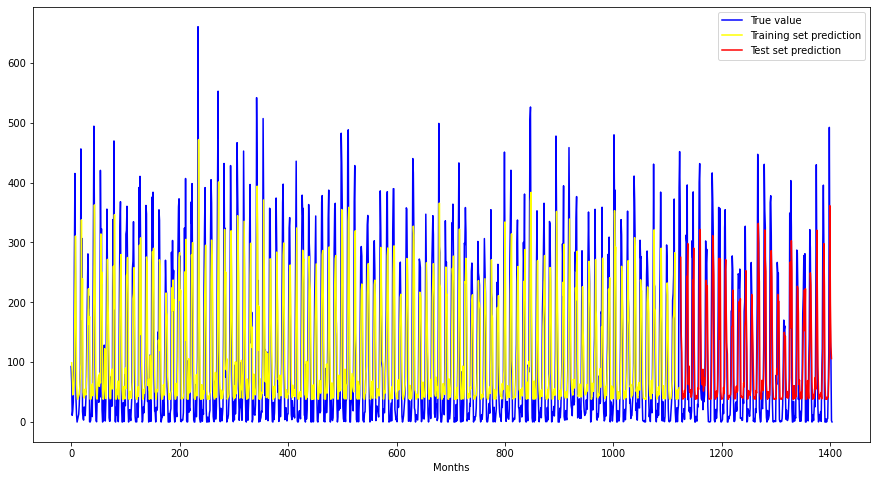


Model :-- XgBoost
Training data score: 31.96 RMSE
Test data score: 134.08 RMSE
Training data score: 15.61 MAE 
Test data score: 88.06 MAE 


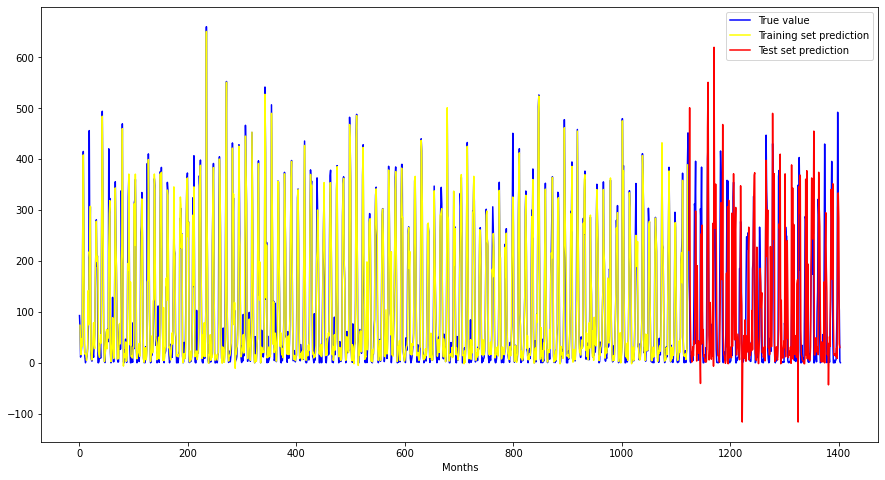


9/9 [==============================] - 0s 10ms/step
Model :-- LSTM Bidirectional
Training data score: 101.77 RMSE
Test data score: 96.57 RMSE
Training data score: 78.32 MAE 
Test data score: 75.50 MAE 


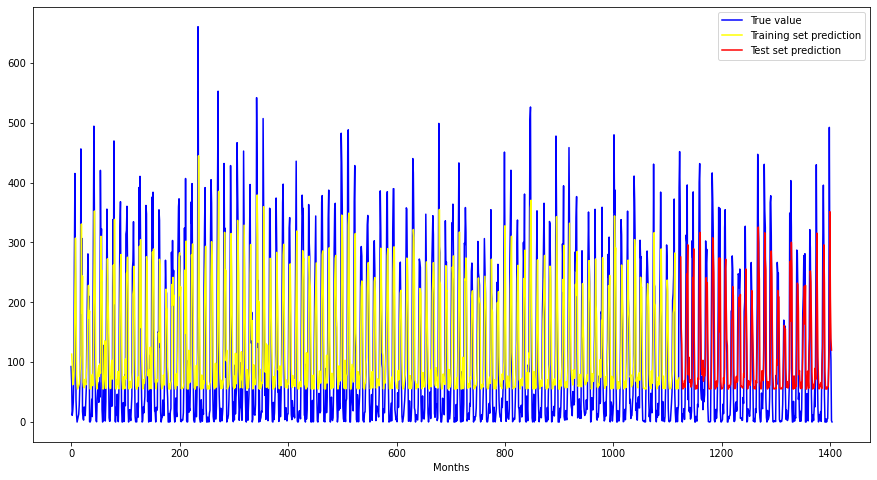


9/9 [==============================] - 0s 6ms/step
Model :-- LSTM Stacked
Training data score: 100.91 RMSE
Test data score: 94.94 RMSE
Training data score: 70.63 MAE 
Test data score: 67.56 MAE 


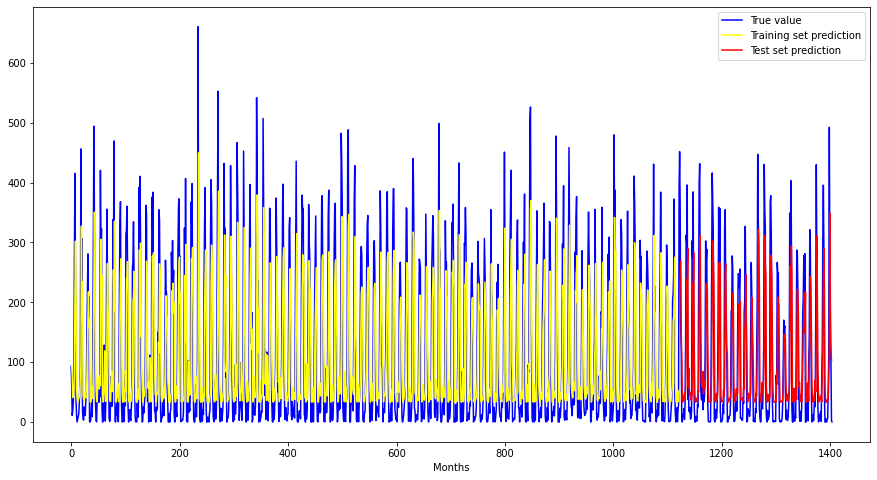

In [46]:
score(models)
score_dl(models_dl)

In [47]:
Scores

{'Elastic Net': [95.25693564808024, 100.98727487906582, 69.090355, 72.1939],
 'XgBoost': [134.07949338685242, 31.961179073579835, 88.0629, 15.605987],
 'LSTM Bidirectional': [96.57201418062063,
  101.7688302884022,
  75.50315414310764,
  78.324382177444],
 'LSTM Stacked': [94.94335399039025,
  100.90616355493964,
  67.55574227990644,
  70.62896199094156]}

In [48]:
d = pd.DataFrame(Scores)

In [49]:
y = d.transpose().reset_index()

In [50]:
y.columns = ['Model','RMSE_Test','RSME_Train','MAE_Test','MAE_Train']

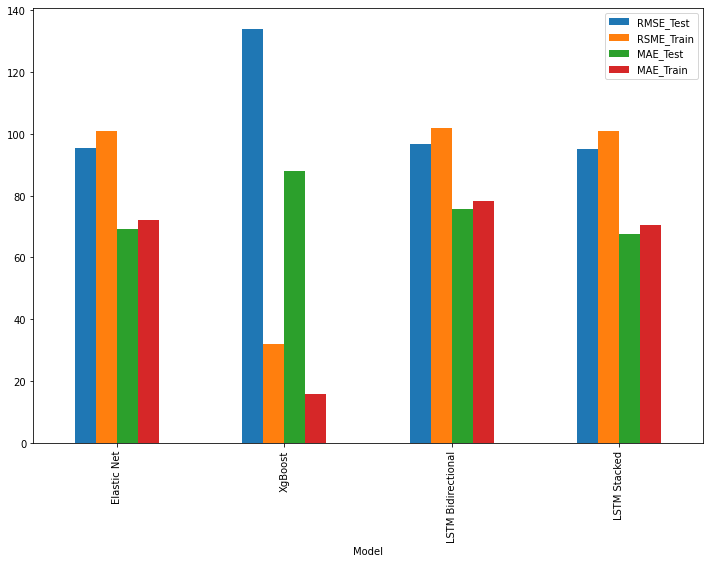

In [51]:
y.plot(x="Model", y=['RMSE_Test','RSME_Train','MAE_Test','MAE_Train'], kind="bar",figsize=(12,8));